In [1]:
import math
import numpy as np
import meep as mp

Using MPI version 3.1, 1 processes


In [2]:
from Simulations.Tangram.helpers import *
from Simulations.Tangram.parameters import Parameters
from Simulations.Tangram.geometry import GeometryHelper
from Simulations.Tangram.FocusingGrating.geometry import Geometry

In [13]:
p = Parameters(#optimization parameters:
               eccentricity=0.1334,
               grating_period=0.72,
               duty_cycle=0.7,
               #other parameters:
               spatial_resolution=15,
               grating_length=10,
               grating_start=5,
               opening_angle=np.pi/3,
               padding = [2, 1, 1],
               pml_thickness=2)

In [14]:
geometry = Geometry(p)
geometry.make_production_geometry()
objects = geometry.get_geometry()

/home/quintsim2/miniconda3/envs/pmp/lib/python3.7/site-packages/meep/visualization.py:197: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


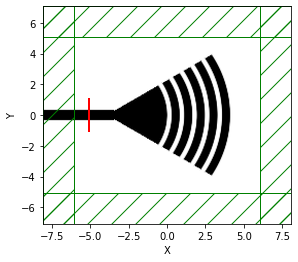

/home/quintsim2/miniconda3/envs/pmp/lib/python3.7/site-packages/meep/visualization.py:197: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


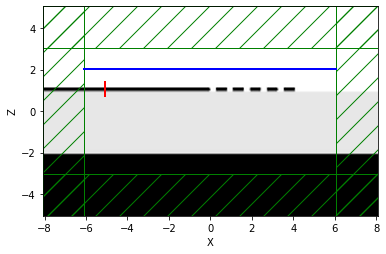

/home/quintsim2/miniconda3/envs/pmp/lib/python3.7/site-packages/meep/visualization.py:197: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


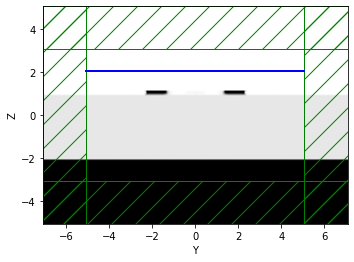

In [15]:
# Set up simulation:

# Source:
source_position = geometry.shift_center + mp.Vector3(x=-geometry.size_x - 0.5 * p.padding[0])
sources = [mp.EigenModeSource(src=mp.GaussianSource(p.f_center, fwidth=p.f_width),
                              component=mp.Ey,
                              size=mp.Vector3(*p.eigensource_size),
                              center=source_position,
                              eig_match_freq=True,
                              eig_parity=mp.ODD_Y,
                              eig_kpoint=mp.Vector3(1.5,0,0),
                              eig_resolution=32)]
# Symmetries:
symmetries = [mp.Mirror(mp.Y,-1)]
# PML layers:
boundary_layers = [ mp.PML(p.pml_thickness) ]
# Cell size:
cell_size = 2 * mp.Vector3(geometry.size_x + p.padding[0] + p.pml_thickness,
                           geometry.size_y + p.padding[1] + p.pml_thickness,
                           geometry.size_z + p.padding[2] + p.pml_thickness)
#Simulation object:
sim = mp.Simulation(resolution=p.spatial_resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=objects,
                    sources=sources,
                    dimensions=3,
                    symmetries=symmetries)

# Create Animate2D object for animated GIF output of fields over time:
xzplane = mp.Block(center=geometry.shift_center, size=mp.Vector3(sim.cell_size.x,0,sim.cell_size.z))
animate = mp.Animate2D(sim,
                       fields=mp.Ey,
                       realtime=False,
                       normalize=True,
                       field_parameters={'alpha':0.9, 'cmap':'RdBu', 'interpolation':'none'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3},
                       output_plane=xzplane)
# Near2Far region:
nearfield = sim.add_near2far(p.f_center, 0, 1, mp.Near2FarRegion(center=geometry.shift_center + mp.Vector3(0, 0, 1), size=2*mp.Vector3(geometry.size_x + p.padding[0], geometry.size_y + p.padding[1], 0)))

plot_xsections(sim, center=geometry.shift_center)

In [9]:
### Buffer ###

In [16]:
mp.quiet(False)
decay_location = mp.Vector3(3, 0, 1.5)
sim.run(mp.at_every(1,animate), until=100) #until_after_sources=mp.stop_when_fields_decayed(5, mp.Ey, decay_location, 1e-3))
animate.to_gif(p.fps, 'x0.gif')

Meep progress: 0.23333333333333334/100.0 = 0.2% done in 4.1s, 1748.5s to go
on time step 7 (time=0.233333), 0.58422 s/step


/home/quintsim2/miniconda3/envs/pmp/lib/python3.7/site-packages/meep/visualization.py:197: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


Meep progress: 1.6/100.0 = 1.6% done in 8.1s, 497.6s to go
on time step 48 (time=1.6), 0.097582 s/step


/home/quintsim2/miniconda3/envs/pmp/lib/python3.7/site-packages/meep/visualization.py:197: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn('The specified user volume is larger than the simulation domain and has been truncated.')


Meep progress: 2.9/100.0 = 2.9% done in 12.1s, 406.6s to go
on time step 87 (time=2.9), 0.103868 s/step
Meep progress: 4.3/100.0 = 4.3% done in 16.2s, 360.1s to go
on time step 129 (time=4.3), 0.096144 s/step
Meep progress: 5.7/100.0 = 5.7% done in 20.2s, 334.8s to go
on time step 171 (time=5.7), 0.0965467 s/step
Meep progress: 7.1/100.0 = 7.1% done in 24.3s, 318.3s to go
on time step 213 (time=7.1), 0.0973265 s/step
Meep progress: 8.466666666666667/100.0 = 8.5% done in 28.3s, 306.3s to go
on time step 254 (time=8.46667), 0.0977775 s/step
Meep progress: 9.833333333333334/100.0 = 9.8% done in 32.4s, 296.7s to go
on time step 295 (time=9.83333), 0.0980358 s/step
Meep progress: 11.2/100.0 = 11.2% done in 36.4s, 288.9s to go
on time step 336 (time=11.2), 0.0997406 s/step
Meep progress: 12.566666666666666/100.0 = 12.6% done in 40.5s, 281.8s to go
on time step 377 (time=12.5667), 0.099069 s/step
Meep progress: 13.933333333333334/100.0 = 13.9% done in 44.5s, 275.0s to go
on time step 418 (tim

Meep progress: 95.93333333333334/100.0 = 95.9% done in 286.3s, 12.1s to go
on time step 2878 (time=95.9333), 0.0983743 s/step
Meep progress: 97.3/100.0 = 97.3% done in 290.4s, 8.1s to go
on time step 2919 (time=97.3), 0.0982274 s/step
Meep progress: 98.66666666666667/100.0 = 98.7% done in 294.4s, 4.0s to go
on time step 2960 (time=98.6667), 0.0984021 s/step
Normalizing field data...
run 0 finished at t = 100.0 (3000 timesteps)
Generating GIF...


In [ ]:
r = 1000/p.f_center # 1000 wavelengths out from the source
npts = 100 # number of points in [0,2*pi) range of angles

farfield = []

for n in range(npts):
    ff = sim.get_farfield(nearfield, mp.Vector3(r*math.cos(math.pi*(n/npts)),0,r*math.sin(math.pi*(n/npts))))
    farfield.append((math.pi*n/npts, *ff))
    
farfield = np.array(farfield)

In [ ]:
Ex=farfield[:,1]; Ey=farfield[:,2]; Ez=farfield[:,3];
Hx=farfield[:,4]; Hy=farfield[:,5]; Hz=farfield[:,6];
Ex=np.conj(Ex); Ey=np.conj(Ey); Ez=np.conj(Ez);
Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
Pr=np.sqrt(np.square(Px)+np.square(Py))
Pnorm = Pr/max(Pr)
ang_min = 57
ang_max = 75
ang_min = ang_min*np.pi/180
ang_max = ang_max*np.pi/180
idx = np.where((farfield[:,0] > ang_min) & (farfield[:,0] < ang_max))
val = sum(Pnorm[idx])/sum(Pnorm)

In [ ]:
val

In [ ]:
np.save('farfield_eps-{}_a-{}_d-{}.npy'.format(p.eccentricity, p.grating_period, p.duty_cycle), farfield)